In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [42]:
import STTstock as STTstock
import utils as utils

In [43]:
# load rates data
Tick_tenors =pd.read_excel(os.getcwd() + '/Risk Free Rates.xlsx')
Rates_history =pd.read_excel(os.getcwd() + '/Risk Free Rates.xlsx', 
                             sheet_name = 'DATA',parse_dates = ['Dates']).set_index('Dates')

# date
Date_analysis ='2018-08-20'

# maturities
maturities = np.array(Tick_tenors['YEARS'])

# rates
rates = np.array(Rates_history.loc[Date_analysis,:])

# forward function
forward_curve = utils.ForwardRates(maturities, rates).forward_rates()

In [51]:
forward_curve([2, 3])

array([0.0285534])

In [57]:
def find_nearest(array, value):
    return (np.abs(np.asarray(array) - value)).argmin()
    
cf_yrs = np.sort(np.arange(5.4, 0.5, -0.5))
T_yrs = np.arange(0, 5.4 + 5.4/3, 5.4/3)
find_nearest_custom = lambda x: find_nearest(T_yrs, x)
T_yrs

array([0. , 1.8, 3.6, 5.4])

In [58]:
cf_yrs, list(map(find_nearest_custom, cf_yrs))

(array([0.9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 4.4, 4.9, 5.4]),
 [1, 1, 1, 1, 2, 2, 2, 2, 3, 3])

In [54]:
T_yrs[list(map(find_nearest_custom, cf_yrs))] = cf_yrs
T_yrs

array([0. , 2.4, 4.4, 5.4])

In [26]:
# test
T = 4.67
C = 1/100
spr= 122.696/100/100
S = 49.58
conv_ratio = 14.3189/10
sigma = 26/100
q = 2.0/100


# create a conv_bond
conv_bond = utils.ConvertibleBondSpec(T, C, spr,conv_ratio)

# create a stock
stock = utils.StockSpec(sigma, S, q)

# price using STT
pricing = STTstock.STTStock(stock, conv_bond, forward_curve, N_steps=500)
pricing.price_conv_bond()

{'price': 95.47217427441227,
 'delta': 0.4208966331901326,
 'gamma': 0.6862700388836153}

In [27]:
# callable and putable bond
call_yrs = np.array([3.63, 4.63])
call_strikes = np.array([100, 100])
put_yrs = np.array([3.63])
put_strikes = np.array([-np.inf])

stock = utils.StockSpec(sigma, S, q)
conv_bond = utils.ConvertibleBondSpec(T, C, spr, conv_ratio, call_yrs=call_yrs, 
                                      call_strikes=call_strikes, put_yrs=put_yrs, put_strikes=put_strikes)

pricing = STTstock.STTStock(stock, conv_bond, forward_curve, N_steps=500)
pricing.price_conv_bond()

{'price': 94.43899977470075,
 'delta': 0.4079702808285878,
 'gamma': 0.7322726907252657}

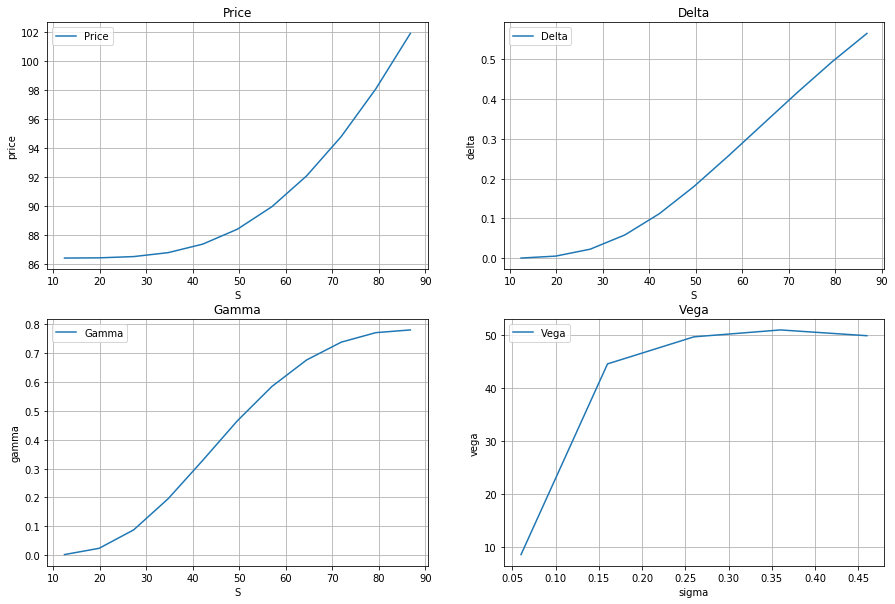

In [28]:
# sensitivities
sensitiv = STTstock.Sensitivities(pricing)
prices = (np.array([-0.75,-0.6,-0.45,-0.3,-0.15,0,0.15,0.3,0.45,0.6,0.75])+1)*S
sensitiv.sensitivities_plot(prices,sigma=[sigma-0.2,sigma-0.1,sigma,sigma+0.1,sigma+0.2])

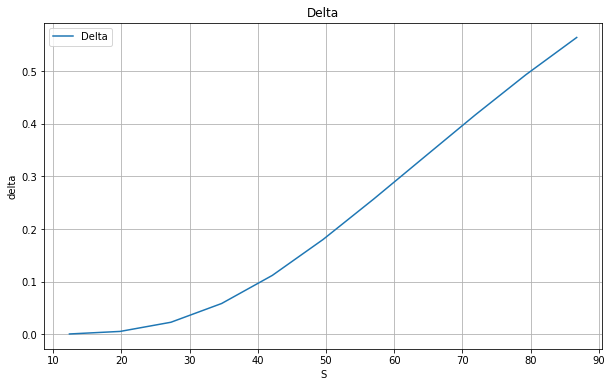

In [30]:
delta = sensitiv.delta(prices)

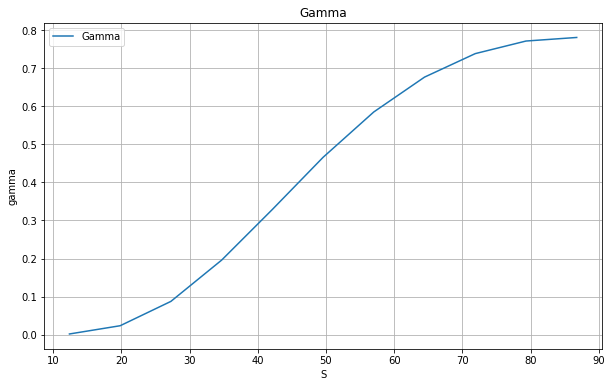

In [31]:
gamma = sensitiv.gamma(prices)

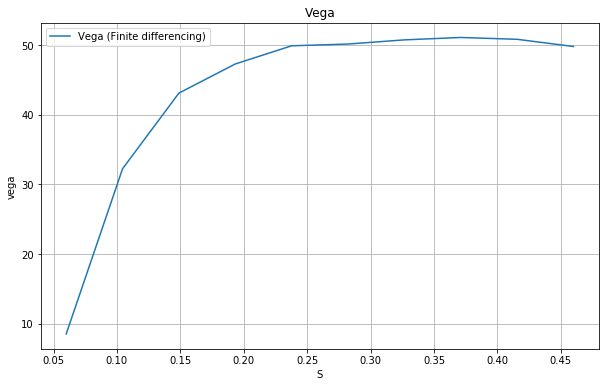

In [36]:
vega = sensitiv.vega_FD(np.linspace(-.2, .2, 10) + sigma, bump=.1)